In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = pd.read_csv('/content/loan_data (1).csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()  # Create a LabelEncoder object
for i in range(X.shape[1]): # Iterate through all columns of X
    if isinstance(X[0, i], str): # Check if the column contains strings
        X[:, i] = le.fit_transform(X[:, i]) # Apply Label Encoding to the column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy}")

Accuracy with k=3: 0.824


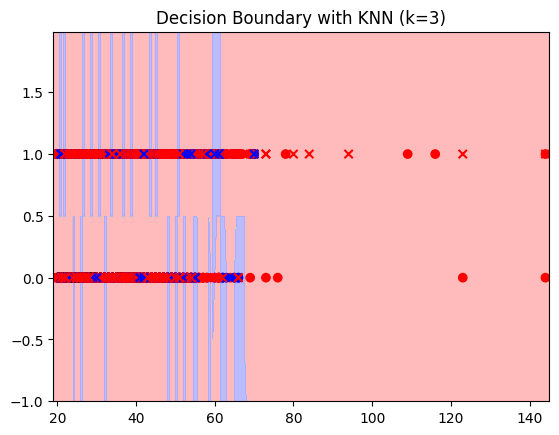

In [25]:
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, marker='o', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, marker='x', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title("Decision Boundary with KNN (k=3)")
plt.show()

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[9545  948]
 [1428 1579]]


In [27]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f"Accuracy without scaling: {accuracy_no_scaling}")
print(f"Accuracy with scaling: {accuracy_with_scaling}")


Accuracy without scaling: 0.824
Accuracy with scaling: 0.8822222222222222


In [28]:
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)

print(f"Accuracy with k=5: {accuracy_k5}")


Accuracy with k=5: 0.8899259259259259
